In [36]:
import matplotlib.pyplot as plt
from nengo import spa
import nengo

# Routed sequence

In [37]:
# Number of dimensions for the Semantic Pointers
dim = 16

# Create the spa.SPA network to which we can add SPA objects
model = spa.SPA(label="Sequence")
with model:
    # Creating a working memory/cortical element
    model.state = spa.State(dimensions=dim, feedback=1, feedback_synapse=0.01)

    # Specifying the action mappings (rules) for BG and Thal
    actions = spa.Actions(
        "dot(state, A) --> state = B",
        "dot(state, B) --> state = C",
        "dot(state, C) --> state = D",
        "dot(state, D) --> state = E",
        "dot(state, E) --> state = A",
    )

    # Creating the BG and thalamus components that confirm to the specified rules
    model.bg = spa.BasalGanglia(actions=actions)
    model.thal = spa.Thalamus(model.bg)

    # Function that provides the model with an initial input semantic pointer.
    def start(t):
        if t < 0.1:  # Duration of the initial input = 0.1
            return "A"
        return "0"

    # Input
    model.input = spa.Input(state=start)
    # visual_p = nengo.Probe(actions)

    # Figure out where the outputs are. There are 5 ensembles in every component, for 5 semantic pointers.
    stn = model.bg.networks[2]
    gpi = model.bg.networks[3]

    stn_probes = []
    gpi_probes = []
    abc = ['A','B','C','D','E']
    for i in range(5):
        stn_probes.append(nengo.Probe(stn.all_ensembles[i],label=f'{abc[i]}'))   # By changing start, we can determine that the 5 ensembles in Stn respectively represent A,B,C,D,E
        gpi_probes.append(nengo.Probe(gpi.all_ensembles[i],label=f'GPi ens {i}'))


In [38]:
with nengo.Simulator(model) as sim:
    sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/Users/beep/PycharmProjects/nengoPlayground/venv/lib/python3.8/site-packages/nengo/builder/builder.py:239: UserWarning: Object <BasalGanglia "bg"> has already been built.
  warnings.warn(f"Object {obj} has already been built.")
/Users/beep/PycharmProjects/nengoPlayground/venv/lib/python3.8/site-packages/nengo/builder/builder.py:239: UserWarning: Object <Thalamus "thal"> has already been built.
  warnings.warn(f"Object {obj} has already been built.")
/Users/beep/PycharmProjects/nengoPlayground/venv/lib/python3.8/site-packages/nengo/builder/optimizer.py:654: UserWarning: Skipping some optimization steps because SciPy is not installed. Installing SciPy may result in faster simulations.
  warnings.warn(


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

## Where are the outputs?

There are 5 ensembles in every component, for 5 semantic pointers.

By changing start, we can determine that the 5 ensembles in Stn correspond in sequence to ABCDE.


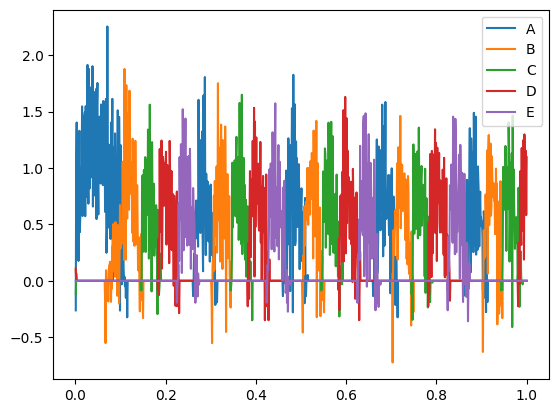

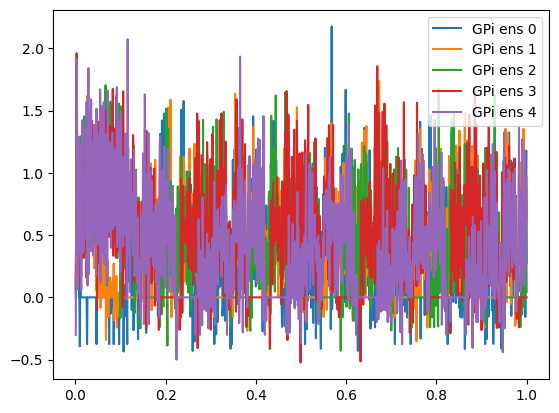

In [39]:
for i in range(5):
    plt.plot(sim.trange(),sim.data[stn_probes[i]],label=f'{stn_probes[i].label}')
    plt.legend()
plt.show()

for i in range(5):
    plt.plot(sim.trange(),sim.data[gpi_probes[i]],label=f'{gpi_probes[i].label}')
    plt.legend()
plt.show()


In [40]:
model.bg.networks[3].all_ensembles

[<Ensemble 'Globus pallidus internus_0' at 0x12df6ed60>,
 <Ensemble 'Globus pallidus internus_1' at 0x12df6ed30>,
 <Ensemble 'Globus pallidus internus_2' at 0x12df6e040>,
 <Ensemble 'Globus pallidus internus_3' at 0x12df6eb50>,
 <Ensemble 'Globus pallidus internus_4' at 0x12df6efd0>]

In [41]:
model.bg.networks

[<EnsembleArray "Striatal D1 neurons" at 0x10ed2ccd0>,
 <EnsembleArray "Striatal D2 neurons" at 0x12dadc970>,
 <EnsembleArray "Subthalamic nucleus" at 0x12dacc280>,
 <EnsembleArray "Globus pallidus internus" at 0x12dc3e070>,
 <EnsembleArray "Globus pallidus externus" at 0x12df6eac0>]

In [42]:
model.bg.networks[2].all_ensembles[0]

<Ensemble 'Subthalamic nucleus_0' at 0x12dc3e310>